## crustpy example

An example which uses crustpy to model the MXB 1659 cooling data 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import ns
from crust import *
import numpy

In [3]:
# These are the 1659 temperature measurements
t0 = 52159.5
tobs = numpy.array([52197.8,52563.2,52712.2,52768.9,53560.0,53576.7,54583.8,56113])-t0
Teffobs = numpy.array([121,85,77,73,58,54,56,48.8])

In [4]:
# Initialize the crust
crust = Crust(mass=1.62,radius=11.2,ngrid=30,Qimp=6.0,Tc=3.1e7)
print crust

M=1.62 R=11.2 g=2.27948 ngrid=30 Tc=3.1e+07 Qimp=6


In [5]:
# Set the top temperature and accrete
crust.set_top_temperature(4.7e8)
t, Teff = crust.evolve(time=2.5*365.0,mdot=0.1)

Evolving in time for 912.5 days at mdot=0.1


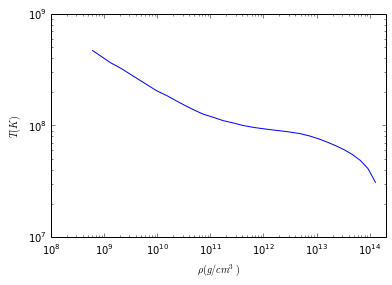

In [6]:
rho, TT = crust.temperature_profile()
plt.xlim([1e8,2e14])
plt.loglog(rho,TT)
plt.xlabel(r'$\rho (g/cm^3)$')
plt.ylabel(r'$T (K)$')

In [7]:
# Now turn off accretion and cool
t, Teff = crust.evolve(time=10000,mdot=0.0)

Evolving in time for 10000 days at mdot=0


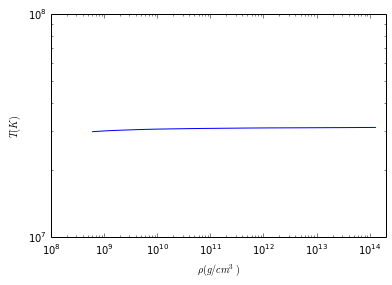

In [8]:
rho, TT = crust.temperature_profile()
plt.xlim([1e8,2e14])
plt.loglog(rho,TT)
plt.xlabel(r'$\rho (g/cm^3)$')
plt.ylabel(r'$T (K)$')

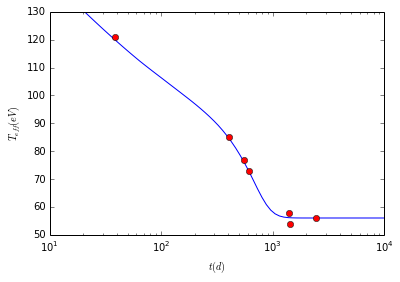

In [9]:
plt.plot(t,Teff)
ax = plt.subplot(111)
plt.plot(tobs,Teffobs,'ro')
plt.xlim([10.0,1e4])
plt.ylim([50.0,130.0])
ax.set_xscale('log')
plt.xlabel(r'$t (d)$')
plt.ylabel(r'$T_{eff} (eV)$')

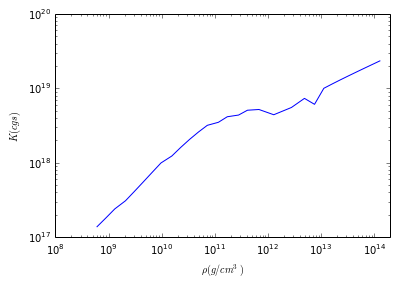

In [10]:
K = numpy.array([item.Kcond for item in crust.grid])
plt.xlim([1e8,2e14])
plt.loglog(rho,K)
plt.xlabel(r'$\rho (g/cm^3)$')
plt.ylabel(r'$K (cgs)$')

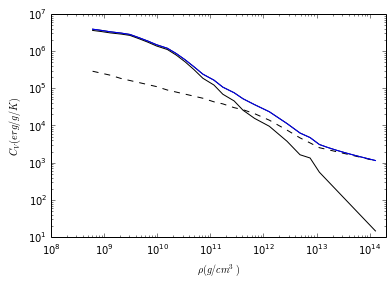

In [11]:
cve = numpy.array([item.CV_electrons() for item in crust.grid])
cvi = numpy.array([item.CV_ions() for item in crust.grid])
cv = numpy.array([item.CV for item in crust.grid])
plt.xlim([1e8,2e14])
plt.loglog(rho,cvi,'k-')
plt.loglog(rho,cve,'k--')
plt.loglog(rho,cve+cvi,'k')
plt.loglog(rho,cv,'b')
plt.xlabel(r'$\rho (g/cm^3)$')
plt.ylabel(r'$C_V (erg/g/K)$')